####  处理文本

In [ ]:
import jieba
with open('xiaoaojianghu.txt', errors='ignore', encoding='utf-16') as f: 
    lines = f.readlines() 
    for line in lines:
        seg_list = jieba.cut(line)
        with open('xiaoaojianghu_new.txt', 'a', encoding='utf-8') as n:
            n.write(' '.join(seg_list))
print("jieba finish")

#### 训练样本

In [1]:
from gensim.models import word2vec
sentences = word2vec.Text8Corpus('xiaoaojianghu_new.txt')
model = word2vec.Word2Vec(sentences,window=5,min_count=5,size=400)

D:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# 得到词向量
model.wv.__getitem__('令狐冲')

array([ 2.08381310e-01, -3.86782512e-02, -4.36882526e-01,  6.64938211e-01,
       -1.19588375e-01,  2.34182701e-01, -1.68066695e-01,  3.86611111e-02,
       -2.47260794e-01,  4.22867127e-02, -4.84414175e-02, -1.27690077e-01,
        2.37559661e-01,  5.56744970e-02,  4.45263118e-01, -8.64815712e-02,
       -4.34307992e-01, -2.57443517e-01, -1.22487232e-01,  6.27262533e-01,
       -5.80071092e-01,  2.56441742e-01,  2.61371940e-01, -4.67312694e-01,
       -1.35400102e-01, -2.17239186e-01,  7.21207112e-02,  2.21545428e-01,
        1.23038433e-01, -2.09629089e-01, -1.77090630e-01, -5.83783627e-01,
       -2.40627691e-01,  7.14443345e-03, -2.57269353e-01,  3.59018221e-02,
        2.76956540e-02, -2.44381994e-01,  9.54196155e-02, -1.73855901e-01,
       -4.12355334e-01,  6.55515864e-02,  6.04365282e-02,  1.09776691e-01,
        6.38985038e-02,  2.89617479e-01,  4.28630412e-02, -3.37929130e-02,
        5.67387491e-02,  1.82020277e-01,  3.13523799e-01,  2.56802708e-01,
        1.20252348e-01, -

In [28]:
# 最相近的词
for e in model.wv.most_similar(positive=['令狐冲'], topn=10):
    print(e)

('林平之', 0.9494855403900146)
('盈盈', 0.9431526064872742)
('岳灵珊', 0.9362791776657104)
('岳不群', 0.918189287185669)
('岳夫人', 0.8940795063972473)
('林震南', 0.8676084876060486)
('黑白子', 0.8664482831954956)
('任我行', 0.864702582359314)
('向问天', 0.8636385798454285)
('余沧海', 0.8619134426116943)


No handles with labels found to put in legend.


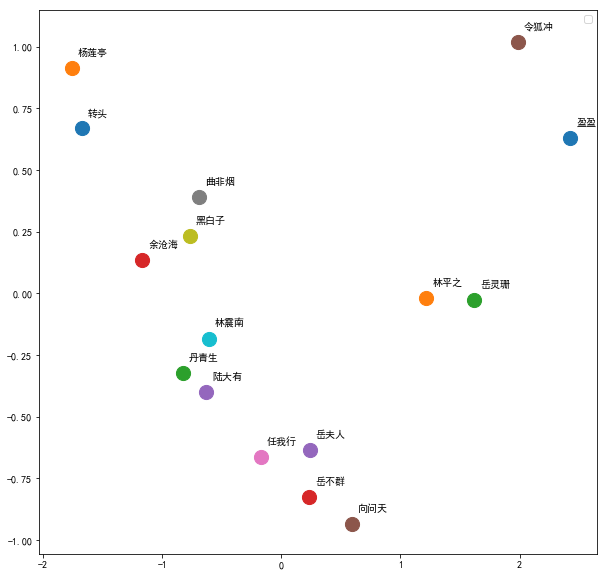

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

word=[e[0] for e in model.wv.most_similar(positive=['令狐冲'], topn=15)]
word.append('令狐冲')
y=np.array(word)

vec_array=np.zeros((len(word),400))
for i in range(len(word)):
    dim_vec=model.wv.__getitem__(word[i])
    vec_array[i]=dim_vec
    
#这一行是让matplotlib显示中文
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

pca=PCA(2)
X=pca.fit_transform(vec_array)

plt.figure(figsize=(10,10))
for j in y:
    plt.scatter(X[y==j,0],X[y==j,1],s=200)
    plt.text(X[y==j,0]+0.05,X[y==j,1]+0.05,j)
plt.legend()
plt.show()